## Import modules

In [63]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import splitfolders

## Split folder to train, test and validation

In [64]:
data_path = 'strawberry_disease_classification data'

splitfolders.ratio(data_path, output="strawberry_disease_preprocessdata", seed=101, ratio=(.8, .1, .1))

Copying files: 795 files [00:01, 538.39 files/s] 


## Preprocessing training set and validation set

In [65]:
train_data_dir = 'strawberry_disease_preprocessdata/train'
validation_data_dir = 'strawberry_disease_preprocessdata/val'

In [66]:
img_width, img_height = 64, 64
batch_size = 32

In [67]:
train_datagen = ImageDataGenerator(
rescale=1. / 255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

In [68]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [69]:
training_set = train_datagen.flow_from_directory(
train_data_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode='categorical')

Found 635 images belonging to 4 classes.


In [70]:
test_set = test_datagen.flow_from_directory(
validation_data_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode='categorical')

Found 78 images belonging to 4 classes.


## Build CNN model

In [91]:
cnn = tf.keras.models.Sequential()

In [92]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [93]:
cnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 32)       

## Train CNN model

In [95]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 40)

Epoch 1/40
20/20 [==============================] - 33s 2s/step - loss: 0.7531 - accuracy: 0.6520 - val_loss: 0.7185 - val_accuracy: 0.6538
Epoch 2/40
20/20 [==============================] - 33s 2s/step - loss: 0.6929 - accuracy: 0.7213 - val_loss: 0.6729 - val_accuracy: 0.6923
Epoch 3/40
20/20 [==============================] - 33s 2s/step - loss: 0.6353 - accuracy: 0.7764 - val_loss: 0.7150 - val_accuracy: 0.6795
Epoch 4/40
20/20 [==============================] - 33s 2s/step - loss: 0.5807 - accuracy: 0.7843 - val_loss: 0.6172 - val_accuracy: 0.6923
Epoch 5/40
20/20 [==============================] - 33s 2s/step - loss: 0.4744 - accuracy: 0.8252 - val_loss: 0.6465 - val_accuracy: 0.7564
Epoch 6/40
20/20 [==============================] - 33s 2s/step - loss: 0.4662 - accuracy: 0.8362 - val_loss: 0.6085 - val_accuracy: 0.8077
Epoch 7/40
20/20 [==============================] - 33s 2s/step - loss: 0.4505 - accuracy: 0.8504 - val_loss: 0.7423 - val_accuracy: 0.6795
Epoch 8/40
20/20 [==

## Predict with test image

In [96]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
test_image = load_img('strawberry_disease_preprocessdata/test/graymold/gray_mold11.jpg',target_size=(64,64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)

1/1 [==============================] - 0s 68ms/step
[[0. 0. 1. 0.]]


In [97]:
score = cnn.evaluate(test_set,batch_size = 32)
print("Accuracy on Test Set : {:.2f}%".format(score[1]*100))

3/3 [==============================] - 3s 625ms/step - loss: 0.6333 - accuracy: 0.8077
Accuracy on Test Set : 80.77%


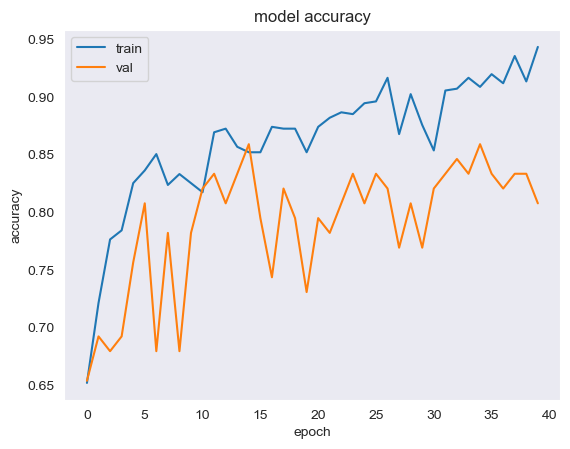

In [100]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

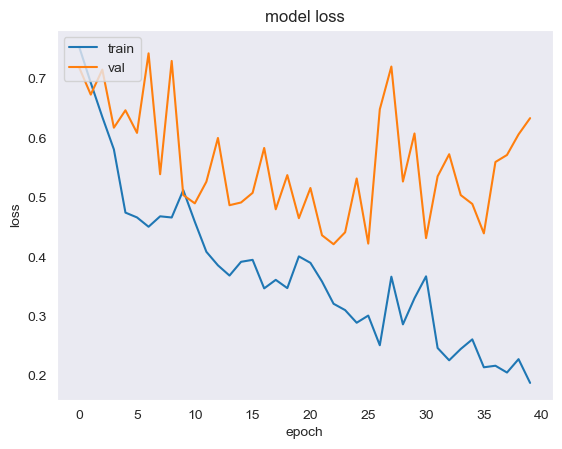

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()